# Energy production by country in 2050

In [50]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import numpy as np

In [65]:
df = pd.read_csv("../data/2050-energy-projections.csv")
df["solar"] = df["resPV_pct"] + df["comPV_pct"] + df["utilPV_pct"]
df["wind"] = df["on_shore_wind_pct"] + df["off_shore_wind_pct"]
df["solar_and_wind"] = df["solar"] + df["wind"]
df["solar"] = 100 * df["solar"] / df["solar_and_wind"]
df["wind"] = 100 * df["wind"] / df["solar_and_wind"]
df = df[["country", "solar", "wind"]]
# drop last row, which is the world
df = df.drop(df.index[-1])

In [66]:
df.loc[df["country"] == "Russian Federation", "country"] = "Russia"
df.loc[df["country"] == "Congo, Dem. Republic", "country"] = "Dem. Rep. Congo" 
df.loc[df["country"] == "Dominican Republic", "country"] = "Dominican Rep."
df.loc[df["country"] == "Korea, Dem. People's Rep.", "country"] = "North Korea"
df.loc[df["country"] == "Korea, Republic of", "country"] = "South Korea"
df.loc[df["country"] == "Iran, Islamic Republic", "country"] = "Iran"
df.loc[df["country"] == "Bosnia and Herzegovina", "country"] = "Bosnia and Herz."
df.loc[df["country"] == "Chinese Taipei", "country"] = "Taiwan"
df.loc[df["country"] == "Macedonia, Republic of", "country"] = "North Macedonia"
df.loc[df["country"] == "Moldova, Republic of", "country"] = "Moldova"
df.loc[df["country"] == "Slovak Republic", "country"] = "Slovakia"
df.loc[df["country"] == "Syrian Arab Republic", "country"] = "Syria"
df.loc[df["country"] == "Tanzania, United Republic of", "country"] = "Tanzania"
df.loc[df["country"] == "Czech Republic", "country"] = "Czechia"

/tmp/ipykernel_11593/2584729142.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_11593/2584729142.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


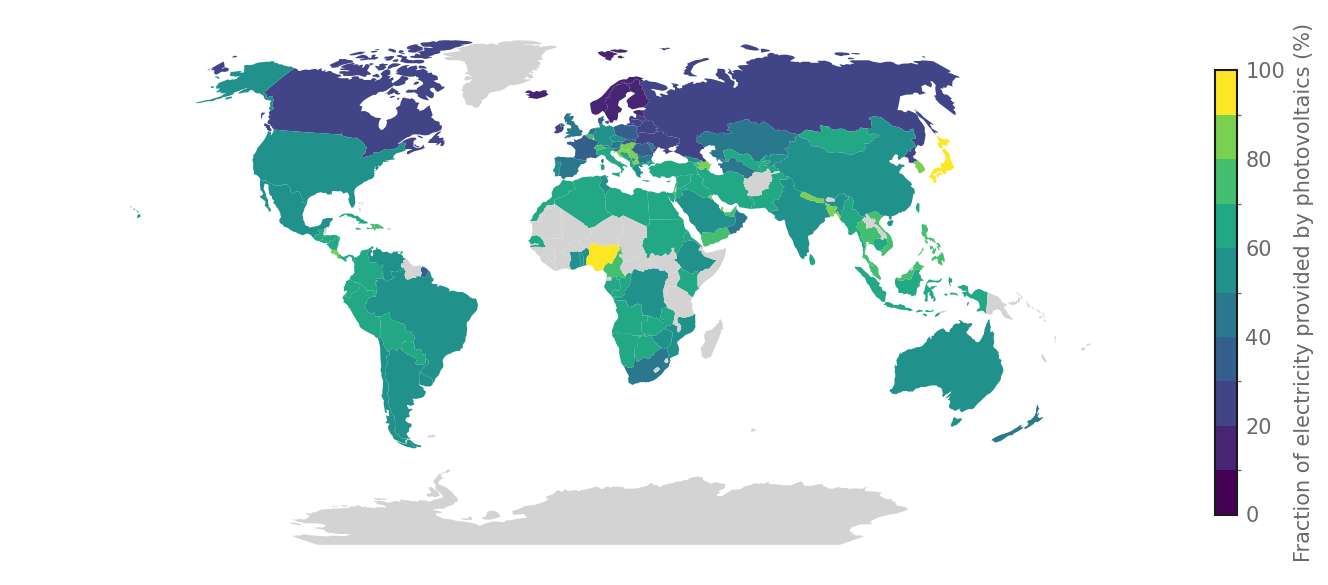

In [87]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(df, left_on="name", right_on="country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="solar",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Fraction of electricity provided by photovoltaics (%)",
        "orientation": "vertical",
        "shrink": 0.8,
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
# fig.colorbar(sm, ax=ax, label='Solar Value')
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig("../results/2050-energy-percentage.pdf", bbox_inches="tight")